In [162]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [163]:
df1=pd.read_csv('imdb_list.csv')
df2=pd.read_csv('imdb_reviews.csv')

In [164]:
df1.head()

,Unnamed: 0,id,title,rating,genre,year
0,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
1,1,tt3774694,Love,6.1,"Drama, Romance",2015
2,2,tt2361509,The Intern,7.1,"Comedy, Drama",2015
3,3,tt2381249,Mission: Impossible - Rogue Nation,7.4,"Action, Adventure, Thriller",2015
4,4,tt3460252,The Hateful Eight,7.8,"Crime, Drama, Mystery",2015


In [165]:
print('Movies Dataframe:\n', df1.head(), '\n')
print('Reviews Dataframe:\n', df2.head())


Movies Dataframe:
    Unnamed: 0         id                               title  rating  \
0           0  tt0369610                      Jurassic World     6.9   
1           1  tt3774694                                Love     6.1   
2           2  tt2361509                          The Intern     7.1   
3           3  tt2381249  Mission: Impossible - Rogue Nation     7.4   
4           4  tt3460252                   The Hateful Eight     7.8   

                         genre  year  
0    Action, Adventure, Sci-Fi  2015  
1               Drama, Romance  2015  
2                Comedy, Drama  2015  
3  Action, Adventure, Thriller  2015  
4        Crime, Drama, Mystery  2015   

Reviews Dataframe:
      imdb_id                                       review title  \
0  tt0369610  Spielberg Magic, This Is Not. Still, a Visit t...   
1  tt0369610  Not a patch on the original Jurassic Park, and...   
2  tt0369610                    Its a Jurassic World after all.   
3  tt0369610  Worthy Seq

In [166]:
df1.columns=df1.columns.str.strip()

In [167]:
df2.columns=df2.columns.str.strip()

In [168]:
#check missinng values 
print('missing value in the movies dataframe:')
print(df1.isnull().sum())

missing value in the movies dataframe:
Unnamed: 0    0
id            0
title         0
rating        0
genre         0
year          0
dtype: int64


In [169]:
df1['year']=pd.to_numeric(df1['year'])

In [170]:
print('missing values in reviews dataframe:')
print(df2.isnull().sum())

missing values in reviews dataframe:
imdb_id            0
review title       0
review_rating    356
review             0
dtype: int64


In [171]:
df2.dropna(subset=['review_rating'], inplace=True)


In [172]:
df2.isnull().sum()

imdb_id          0
review title     0
review_rating    0
review           0
dtype: int64

In [173]:
df1.duplicated().sum()

np.int64(0)

In [174]:
df2.duplicated().sum()

np.int64(23)

In [175]:
df2[df2.duplicated()]

,imdb_id,review title,review_rating,review
5966,tt1431045,Absolutely hilarious but not for everyone,8.0,"""Deadpool"" is absolutely hilarious. The story ..."
5967,tt1431045,"""Please don't make the super suit green...or a...",8.0,One of the greatest anti-hero - the Merc with ...
5968,tt1431045,CAN I SEE YOU BETWEEN THE HOLIDAYS?,10.0,The film opens with realistic gag credits and ...
5970,tt1431045,"""Bad Deadpool - Good Deadpool Film!""",9.0,"If anyone else could be cast to play Deadpool,..."
5971,tt1431045,This is what it looks like when filmmakers tak...,8.0,Deadpool is a triumph of artistic vision over ...
5972,tt1431045,a much needed breath of fresh air in a stale g...,8.0,"At first glance, Deadpool seems like a typical..."
5973,tt1431045,I am NOT the target audience for this one...pl...,7.0,I am a 53 year-old man...and the target audien...
5974,tt1431045,"""Let's count 'em down!""",10.0,This movie is absolutely brilliant! It's one o...
5975,tt1431045,A movie too conventional for an unconventional...,6.0,Let me just say off the bat that I liked this ...
5976,tt1431045,"Funny, entertaining and refreshing",8.0,I am aware that to many people (especially tho...


In [176]:
df1.columns

Index(['Unnamed: 0', 'id', 'title', 'rating', 'genre', 'year'], dtype='object')

In [177]:
df2.columns

Index(['imdb_id', 'review title', 'review_rating', 'review'], dtype='object')

In [178]:
df = pd.merge(df2, df1, left_on='imdb_id', right_on='id', how='left')

In [179]:
df1.head(1)

,Unnamed: 0,id,title,rating,genre,year
0,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015


In [180]:
df2.head(1)

,imdb_id,review title,review_rating,review
0,tt0369610,"Spielberg Magic, This Is Not. Still, a Visit t...",7.0,You may have heard some critics champion Juras...


In [181]:
df.head()

,imdb_id,review title,review_rating,review,Unnamed: 0,id,title,rating,genre,year
0,tt0369610,"Spielberg Magic, This Is Not. Still, a Visit t...",7.0,You may have heard some critics champion Juras...,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
1,tt0369610,"Not a patch on the original Jurassic Park, and...",7.0,The original Jurassic Park still is a personal...,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
2,tt0369610,Its a Jurassic World after all.,7.0,The 4th film in the Jurassic Park series and t...,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
3,tt0369610,Manages to somewhat return the Jurassic Park s...,6.0,Modernized and polished entry to the Jurassic ...,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
4,tt0369610,Very good but more a remake of the first two m...,7.0,"Like it's dinosaur Frankenstein creation, Jura...",0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015


In [182]:
print(df.columns.tolist())

['imdb_id', 'review title', 'review_rating', 'review', 'Unnamed: 0', 'id', 'title', 'rating', 'genre', 'year']


In [183]:
print(df.head())
df.info()
df.isnull().sum()


     imdb_id                                       review title  \
0  tt0369610  Spielberg Magic, This Is Not. Still, a Visit t...   
1  tt0369610  Not a patch on the original Jurassic Park, and...   
2  tt0369610                    Its a Jurassic World after all.   
3  tt0369610  Manages to somewhat return the Jurassic Park s...   
4  tt0369610  Very good but more a remake of the first two m...   

   review_rating                                             review  \
0            7.0  You may have heard some critics champion Juras...   
1            7.0  The original Jurassic Park still is a personal...   
2            7.0  The 4th film in the Jurassic Park series and t...   
3            6.0  Modernized and polished entry to the Jurassic ...   
4            7.0  Like it's dinosaur Frankenstein creation, Jura...   

   Unnamed: 0         id           title  rating                      genre  \
0           0  tt0369610  Jurassic World     6.9  Action, Adventure, Sci-Fi   
1           

imdb_id          0
review title     0
review_rating    0
review           0
Unnamed: 0       0
id               0
title            0
rating           0
genre            0
year             0
dtype: int64

In [184]:
df.nunique()

imdb_id           249
review title     5751
review_rating      10
review           5861
Unnamed: 0        250
id                249
title             250
rating             28
genre              88
year               10
dtype: int64

genre
Action, Drama                   9.200000
Animation, Drama, Fantasy       9.040000
Animation, Adventure, Drama     8.782609
Drama, Mystery                  8.695652
Animation, Action, Adventure    8.452991
Comedy, Drama, Music            8.404255
Action, Drama, War              8.375000
Biography, Drama, History       8.358974
Action, Drama, Mystery          8.333333
Animation, Adventure, Comedy    8.234043
Name: review_rating, dtype: float64


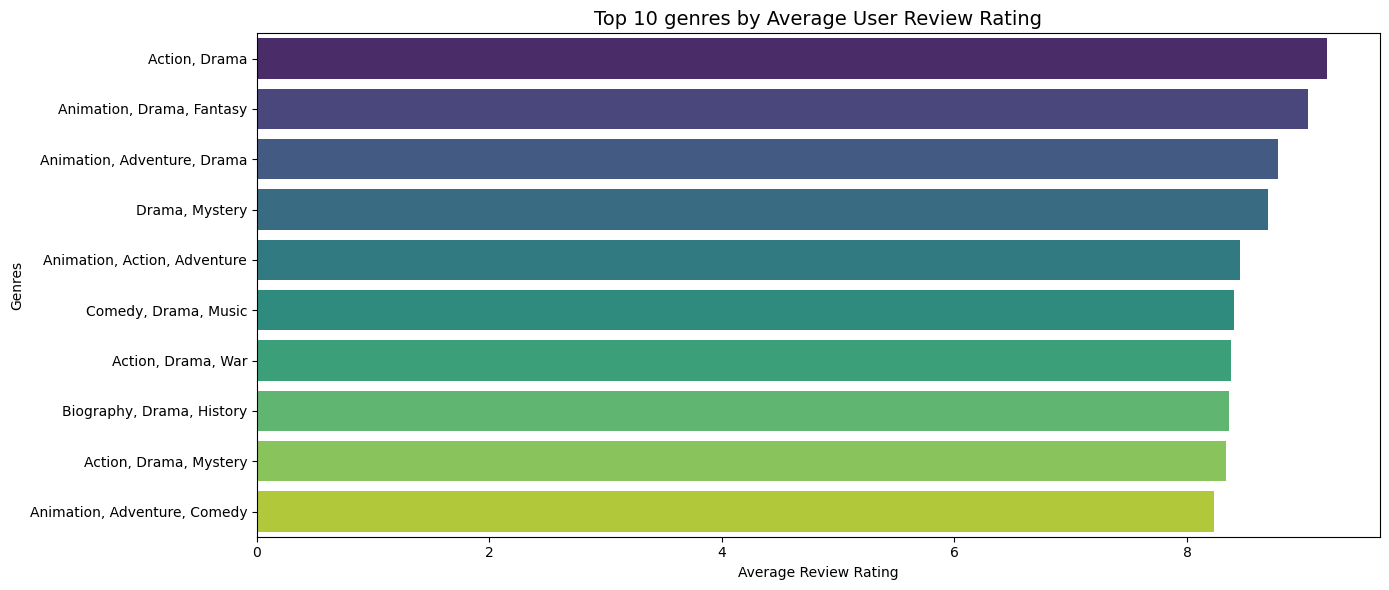

In [ ]:
#What genres have the highest-rated reviews rating
genres_review=df.groupby('genre')['review_rating'].mean()
genres_review = genres_review.sort_values(ascending=False).head(10)
fig,ax=  plt.subplots(figsize=(14,6))
sns.barplot(x=genres_review.values, y=genres_review.index, palette="viridis")
print(genres_review)

plt.title('Top 10 genres by Average User Review Rating', fontsize=14)
plt.xlabel('Average Review Rating')
plt.ylabel('Genres')

plt.tight_layout()
plt.show()

title
12th Fail                                                  9.240000
Top Gun: Maverick                                          9.200000
Avengers: Infinity War                                     9.125000
Your Name.                                                 9.040000
Spider-Man: Across the Spider-Verse                        8.958333
Spider-Man: Into the Spider-Verse                          8.869565
Coco                                                       8.782609
Joker                                                      8.720000
The Father                                                 8.695652
Demon Slayer: Kimetsu no Yaiba - The Movie: Mugen Train    8.652174
Name: review_rating, dtype: float64


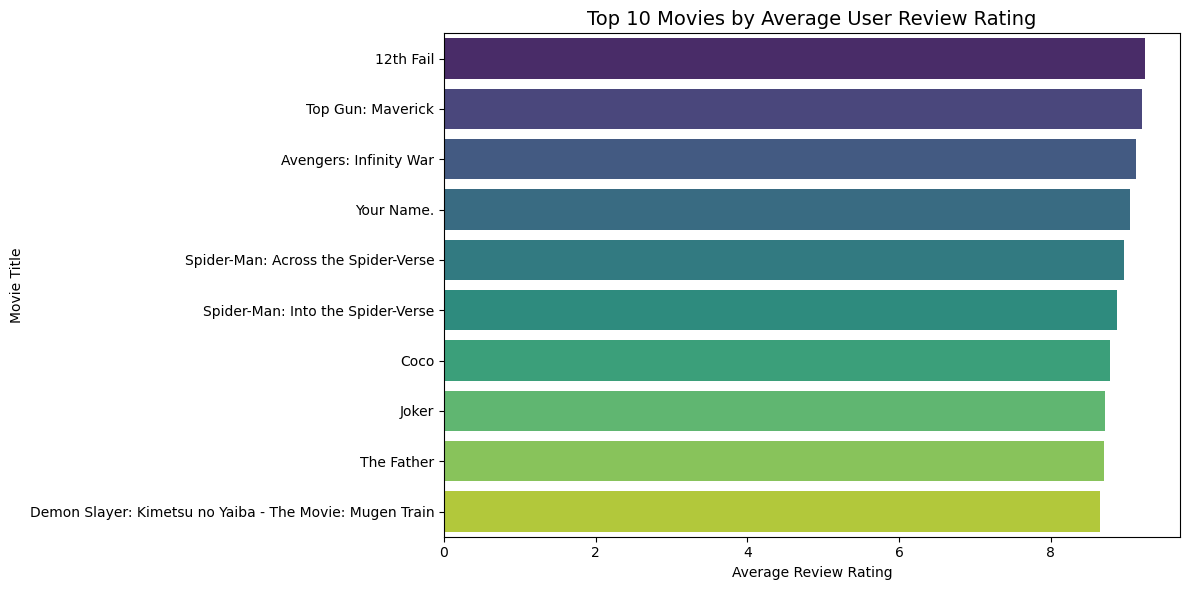

In [186]:
# Group by movie title and calculate mean of user review rating
top_movies = df.groupby('title')['review_rating'].mean().sort_values(ascending=False).head(10)
print(top_movies)
plt.figure(figsize=(12,6))
sns.barplot(x=top_movies.values, y=top_movies.index, palette="viridis")

plt.title('Top 10 Movies by Average User Review Rating', fontsize=14)
plt.xlabel('Average Review Rating')
plt.ylabel('Movie Title')

plt.tight_layout()
plt.show()



#### Insight
Based on average user review ratings, 12th Fail emerged as the most emotionally resonant film with an average score of 9.24 out of 10. Interestingly, highly popular movies like Top Gun: Maverick and Avengers: Infinity War also performed exceptionally well with over 9+ average user ratings. This indicates a strong emotional or personal connection with these movies, as expressed by individual reviewers.

                                     review_rating  rating
title                                                     
12th Fail                                 9.240000     8.7
I'm Still Here                            8.625000     8.6
Dune: Part Two                            8.208333     8.5
Parasite                                  8.363636     8.5
Spider-Man: Across the Spider-Verse       8.958333     8.5
Avengers: Infinity War                    9.125000     8.4
Avengers: Endgame                         8.181818     8.4
Spider-Man: Into the Spider-Verse         8.869565     8.4
Capernaum                                 8.521739     8.4
Coco                                      8.782609     8.4


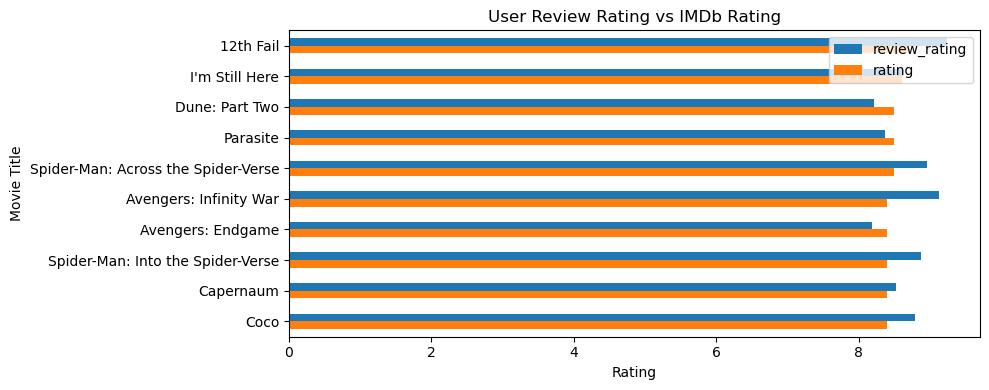

In [187]:
# Group by title and calculate both average user review rating and IMDb rating
rating_compare = df.groupby('title').agg({'review_rating': 'mean','rating': 'mean'})

rating_compare = rating_compare.sort_values(by='rating', ascending=False).head(10)
print(rating_compare)

rating_compare[['review_rating', 'rating']].plot(kind='barh', figsize=(10,4))
plt.title("User Review Rating vs IMDb Rating")
plt.xlabel("Rating")
plt.ylabel("Movie Title")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



 #### Insight
Some movies were rated significantly higher by individual reviewers compared to their IMDb rating.
- 12th Fail had an average user review rating of 9.24, while its IMDb rating is 8.7.
- Avengers: Infinity War scored 9.12 in reviews vs. 8.4 on IMDb.
- Spider-Man: Across the Spider-Verse also shows this pattern (8.95 vs 8.5).

This suggests that personal experiences or emotional connection often lead users to rate movies more highly than the general IMDb score.

In [188]:
df.head(1)

,imdb_id,review title,review_rating,review,Unnamed: 0,id,title,rating,genre,year
0,tt0369610,"Spielberg Magic, This Is Not. Still, a Visit t...",7.0,You may have heard some critics champion Juras...,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015


In [189]:
df.columns

Index(['imdb_id', 'review title', 'review_rating', 'review', 'Unnamed: 0',
       'id', 'title', 'rating', 'genre', 'year'],
      dtype='object')

In [190]:
#Which movie received the most reviews from users?

In [191]:

review_counts = df['title'].value_counts().head(10)
print(review_counts)



title
Deadpool                   46
Deadpool & Wolverine       46
Your Name.                 25
Hidden Figures             25
The Intern                 25
Joker                      25
Ready or Not               25
Solo: A Star Wars Story    25
Black Panther              25
Wind River                 25
Name: count, dtype: int64


In [192]:
review_counts=df['title'].value_counts().reset_index().head(10)
review_counts.columns = ['title', 'number_of_reviews']
review_counts.head(10)

,title,number_of_reviews
0,Deadpool,46
1,Deadpool & Wolverine,46
2,Your Name.,25
3,Hidden Figures,25
4,The Intern,25
5,Joker,25
6,Ready or Not,25
7,Solo: A Star Wars Story,25
8,Black Panther,25
9,Wind River,25


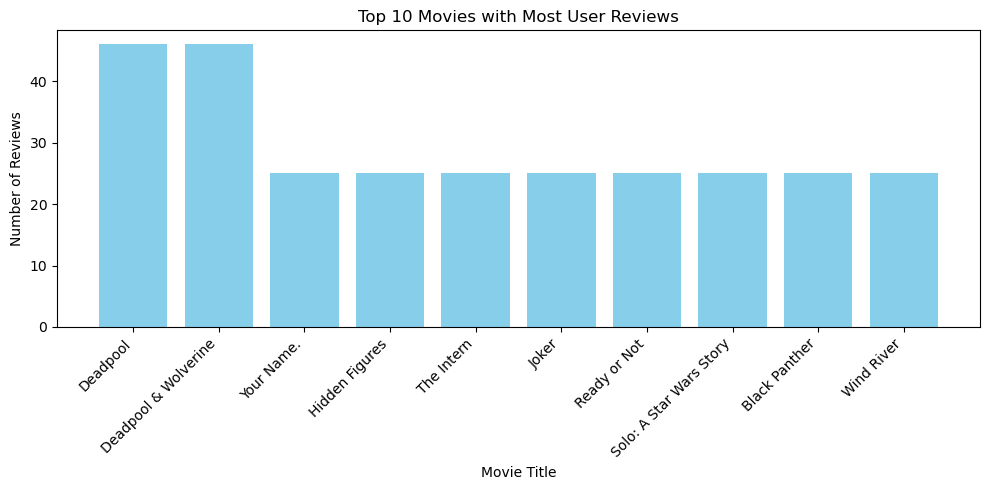

In [193]:
top10 = review_counts.head(10)

plt.figure(figsize=(10, 5))
plt.bar(top10['title'], top10['number_of_reviews'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Movies with Most User Reviews')
plt.xlabel('Movie Title')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


#### Insight
The movie that received the most user reviews was Deadpool, followed by Deadpool & Wolberine and Your Name.
This suggests that these movies were either highly popular, heavily marketed, or emotionally provocative enough to drive significant audience interaction.

It's important to note that high review count does not imply high ratings, but it does signal engagement and reach.

In [194]:
df.head(1)

,imdb_id,review title,review_rating,review,Unnamed: 0,id,title,rating,genre,year
0,tt0369610,"Spielberg Magic, This Is Not. Still, a Visit t...",7.0,You may have heard some critics champion Juras...,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015


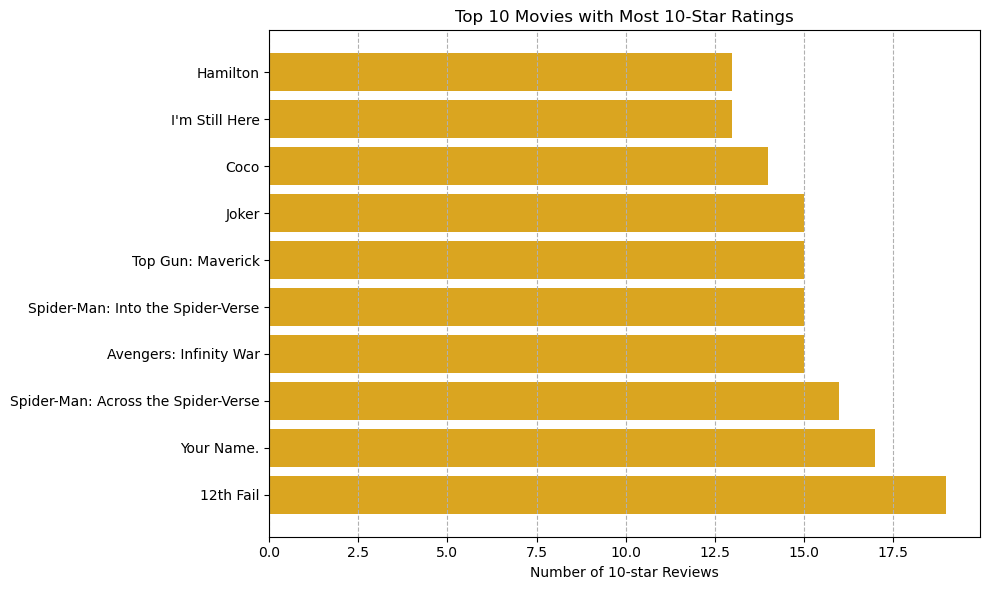

title
12th Fail                              19
Your Name.                             17
Spider-Man: Across the Spider-Verse    16
Avengers: Infinity War                 15
Spider-Man: Into the Spider-Verse      15
Top Gun: Maverick                      15
Joker                                  15
Coco                                   14
I'm Still Here                         13
Hamilton                               13
Name: count, dtype: int64


In [195]:
# movie has the most 10-star reviews
perfect_10=df[df['review_rating']==10.0]
ten_star_counts=perfect_10['title'].value_counts().head(10)
ten_star_counts-ten_star_counts.sort_values( ascending=True)

plt.figure(figsize=(10,6))
plt.barh(ten_star_counts.index, ten_star_counts.values, color='goldenrod')
plt.xlabel("Number of 10-star Reviews")
plt.title("Top 10 Movies with Most 10-Star Ratings")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()
print(ten_star_counts)


#### Insight
Among all the movies in the dataset, '12th Fail' received the highest number of perfect 10-star user reviews, with a total of 19 ratings. This suggests an exceptionally strong emotional or inspirational impact on the audience. Other highly praised titles include 'Your Name.' (17), 'Spider-Man: Across the Spider-Verse' (16), and 'Avengers: Infinity War' (15). These consistently top-rated films highlight a combination of powerful storytelling, emotional depth, and audience connection, even beyond their IMDb averages.

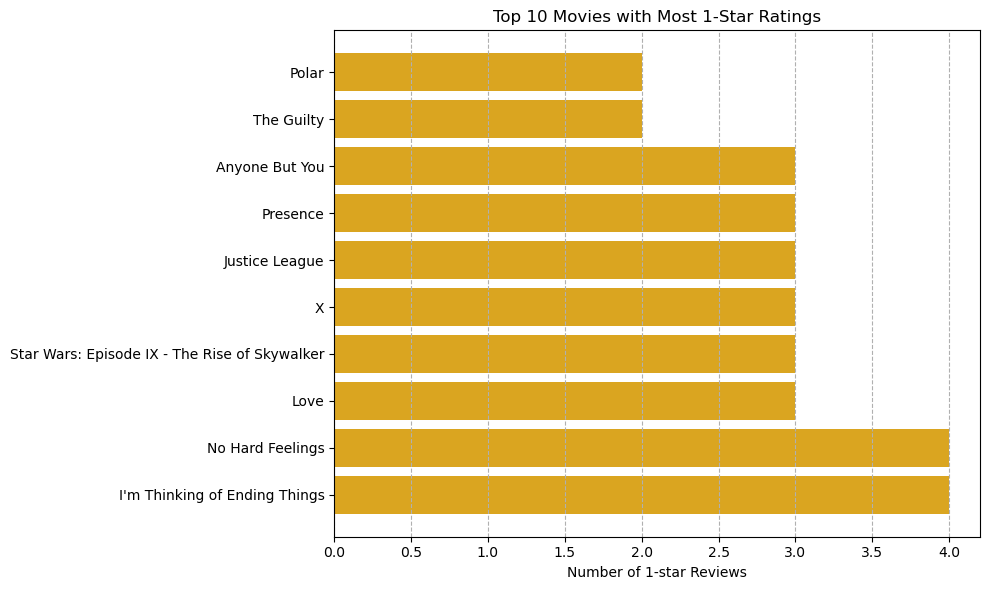

title
I'm Thinking of Ending Things                    4
No Hard Feelings                                 4
Love                                             3
Star Wars: Episode IX - The Rise of Skywalker    3
X                                                3
Justice League                                   3
Presence                                         3
Anyone But You                                   3
The Guilty                                       2
Polar                                            2
Name: count, dtype: int64


In [200]:
# movie has the most 10-star reviews
lowest_rated=df[df['review_rating']==1.0]
one_star_counts=lowest_rated['title'].value_counts().head(10)
one_star_counts-one_star_counts.sort_values()

plt.figure(figsize=(10,6))
plt.barh(one_star_counts.index, one_star_counts.values, color='goldenrod')
plt.xlabel("Number of 1-star Reviews")
plt.title("Top 10 Movies with Most 1-Star Ratings")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()
print(one_star_counts)


#### Insight
The movie "I'm Thinking of Ending Things" got the most 1-star reviews. Total 4 people gave it 1-star, which means many viewers didn’t like it.

After that, "No Hard Feelings" also got 4 bad reviews.

Other movies like "Love", "Star Wars: Episode IX", and "Justice League" also had 3 or more 1-star ratings.
This shows that even popular movies can get bad reviews if people don’t enjoy them.

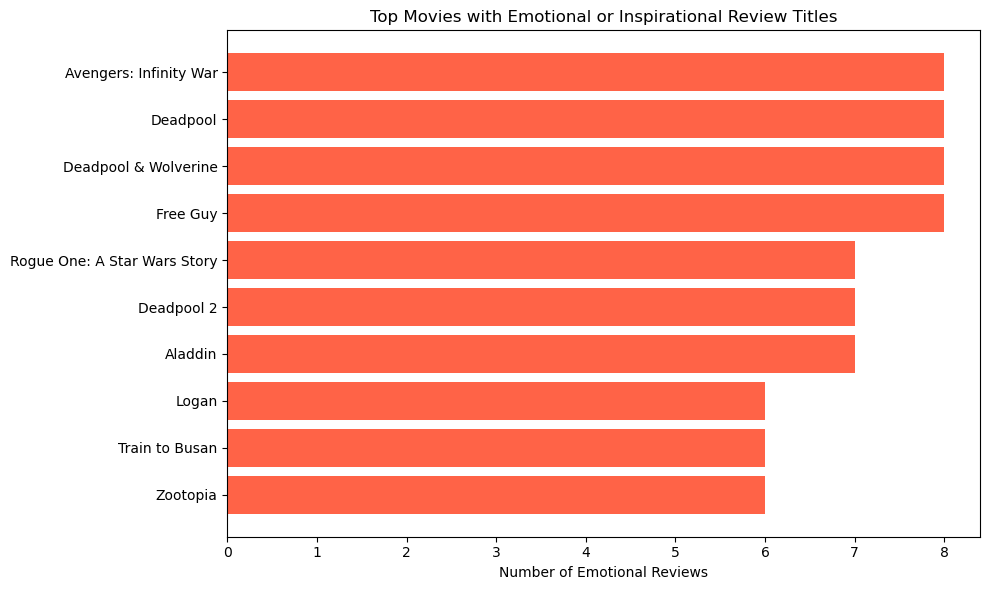

title
Zootopia                        6
Train to Busan                  6
Logan                           6
Aladdin                         7
Deadpool 2                      7
Rogue One: A Star Wars Story    7
Free Guy                        8
Deadpool & Wolverine            8
Deadpool                        8
Avengers: Infinity War          8
Name: count, dtype: int64


In [203]:
#Do review title and ratings align?
keywords = ['life-changing', 'inspiring', 'inspirational', 'emotional', 'best', 'good', 'worthy']

keyword_reviews = df[df['review title'].str.lower().str.contains('|'.join(keywords))]

emotion_counts=keyword_reviews['title'].value_counts().head(10)
emotion_counts=emotion_counts.sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.barh(emotion_counts.index, emotion_counts.values, color='tomato')
plt.xlabel('Number of Emotional Reviews')
plt.title('Top Movies with Emotional or Inspirational Review Titles')
plt.tight_layout()
plt.show()
print(emotion_counts)


#### Insight
These are the top 10 movies where people used words like emotional, inspiring, life-changing in their review titles.
Free Guy-8, Deadpool & Wolverine-, Deadpool-8, Avengers: Infinity War-8

It shows that viewers really connected with these movies personally.
We also saw that most of these movies have high average ratings, so yes — emotional highlights mostly match the good ratings.
People loved them both in feelings and numbers.

In [207]:
df.head(5)

,imdb_id,review title,review_rating,review,Unnamed: 0,id,title,rating,genre,year
0,tt0369610,"Spielberg Magic, This Is Not. Still, a Visit t...",7.0,You may have heard some critics champion Juras...,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
1,tt0369610,"Not a patch on the original Jurassic Park, and...",7.0,The original Jurassic Park still is a personal...,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
2,tt0369610,Its a Jurassic World after all.,7.0,The 4th film in the Jurassic Park series and t...,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
3,tt0369610,Manages to somewhat return the Jurassic Park s...,6.0,Modernized and polished entry to the Jurassic ...,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
4,tt0369610,Very good but more a remake of the first two m...,7.0,"Like it's dinosaur Frankenstein creation, Jura...",0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015


genre
Romance       79
Thriller     105
Crime        122
Animation    138
Biography    150
Sci-Fi       154
Comedy       198
Adventure    302
Action       390
Drama        592
Name: count, dtype: int64


<BarContainer object of 10 artists>

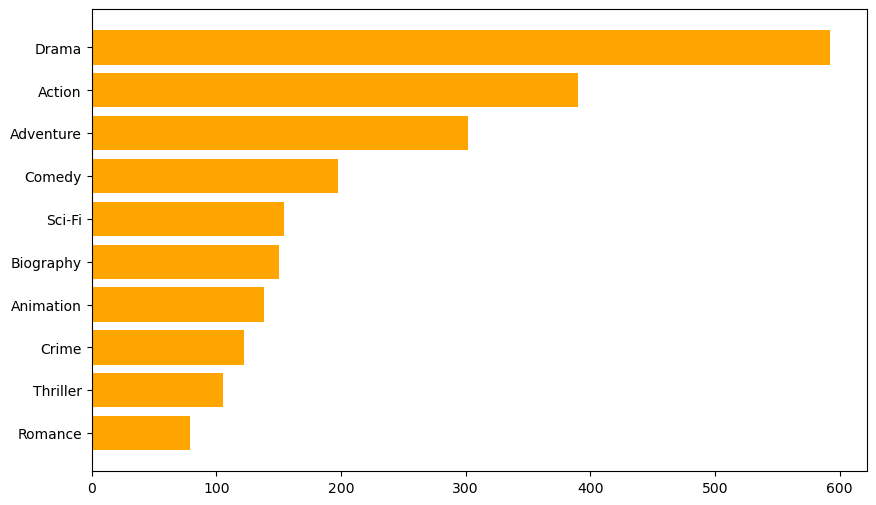

In [208]:
#Which genres received the most perfect 10 ratings?

perfect_rating = df[df['review_rating']==10.0]
perfect_10_genre=perfect_rating['genre'].str.split(', ')
explode_genre=perfect_10_genre.explode() #Now every row has just one genre
genre_count=explode_genre.value_counts().head(10).sort_values()
print(genre_count)
plt.figure(figsize=(10,6))
plt.barh(genre_count.index, genre_count.values, color='orange')



#### Insight
From user reviews, it looks like Drama movies received the highest number of 10-star ratings. This shows people often give perfect scores to emotionally deep or story-driven films. Action and Adventure also got lots of love, meaning audiences enjoy both high-energy and visually rich movies.

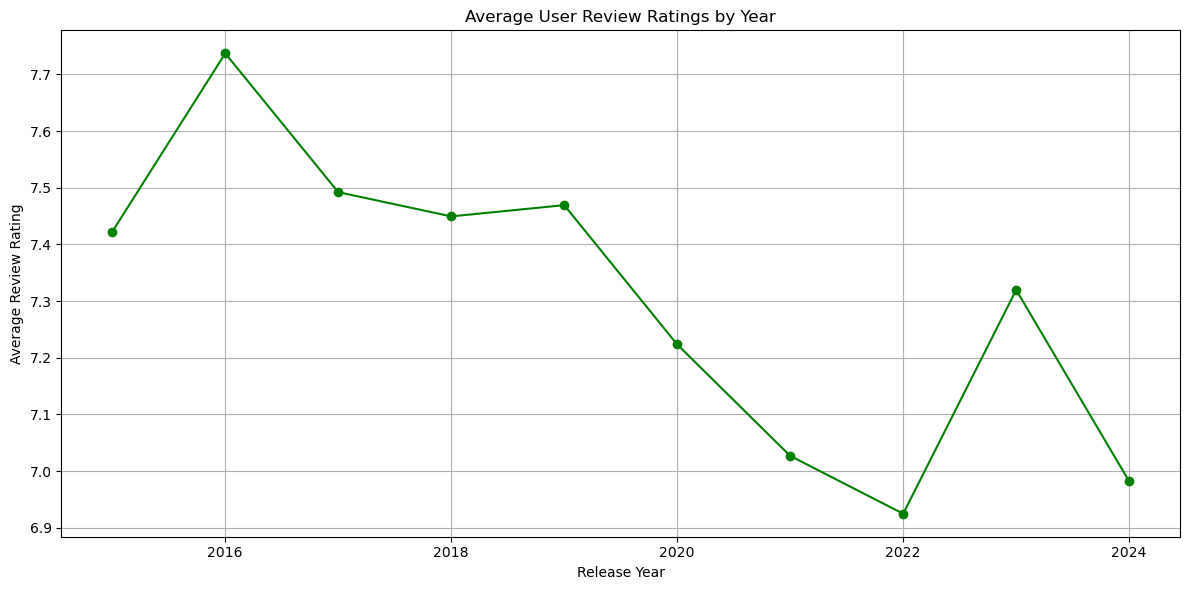

year
2016    7.737274
2017    7.492308
2019    7.469388
2018    7.449573
2015    7.422414
2023    7.319797
2020    7.223549
2021    7.026936
2024    6.982085
2022    6.924875
Name: review_rating, dtype: float64


In [214]:
#Does release year affect review scores
yearly_avg = df.groupby('year')['review_rating'].mean()

plt.figure(figsize=(12,6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='green')
plt.title("Average User Review Ratings by Year")
plt.xlabel("Release Year")
plt.ylabel("Average Review Rating")
plt.grid(True)
plt.tight_layout()
plt.show()
print(yearly_avg.sort_values(ascending=False))


#### Insight
From 2015 to 2024, I can see that movies released around 2016 had the highest average ratings from users. After 2016, the average ratings slowly started to go down. Especially in 2022 and 2024, the ratings are the lowest. This shows that users liked movies more in the past compared to the newer movies.

positive : 7.942477876106195
negativve: 5.526923076923077


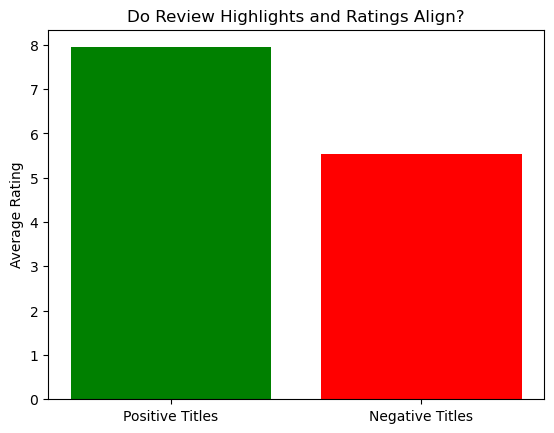

In [ ]:
#Do review title and ratings align?
positive_keywords = ['amazing', 'excellent', 'brilliant', 'great', 'outstanding', 'masterpiece', 'love', 'incredible']
negative_keywords = ['worst', 'boring', 'bad', 'waste', 'disappointing', 'awful', 'terrible', 'poor']

positive_reviews = df[df['review title'].str.lower().str.contains('|'.join(positive_keywords), na=False)]
negative_reviews = df[df['review title'].str.lower().str.contains('|'.join(negative_keywords), na=False)]

positive_avg = positive_reviews['review_rating'].mean()
negative_avg = negative_reviews['review_rating'].mean()
print('positive :' , positive_avg)
print('negativve:', negative_avg)
import matplotlib.pyplot as plt

plt.bar(['Positive Titles', 'Negative Titles'], [positive_avg, negative_avg], color=['green', 'red'])
plt.ylabel('Average Rating')
plt.title('Do Review Highlights and Ratings Align?')
plt.show()

#### Insight
people who write good words in the review title (like amazing, great, or love) mostly gave high ratings.
And people who used bad words (like boring, worst, or awful) gave low ratings.
So yes, the review title and the rating mostly match each other.

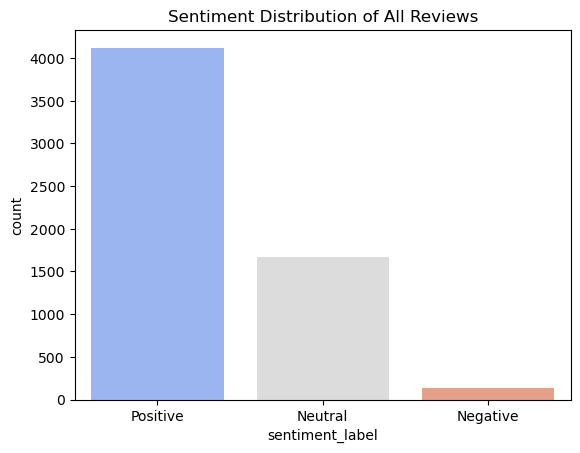

sentiment_label
Positive    4122
Neutral     1670
Negative     139
Name: count, dtype: int64


In [228]:
#Sentiment Analysis of Reviews
from textblob import TextBlob

def get_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

df['sentiment_score'] = df['review'].apply(get_sentiment)

def label_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

sentiment_counts=df['sentiment_label'].value_counts()

sns.countplot(data=df, x='sentiment_label', palette='coolwarm')
plt.title('Sentiment Distribution of All Reviews')
plt.show()

print(sentiment_counts)


#### Insight
- Most of the reviews are Positive (4122 reviews), which means people generally liked the movies they reviewed.
- A decent number of reviews are Neutral (1670), which shows that many viewers had mixed or average feelings.
- Only a small number are Negative (139), showing that very few people had bad experiences or strongly disliked the movies.

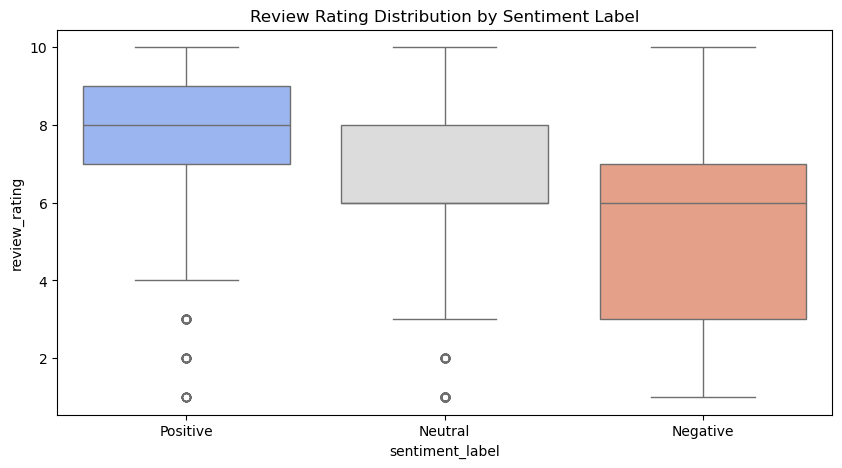

In [230]:
#Compare Sentiment vs Rating
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sentiment_label', y='review_rating', palette='coolwarm')
plt.title('Review Rating Distribution by Sentiment Label')
plt.show()


#### Insight
People who gave positive sentiments usually rated movies very high (mostly 8 or more).
Neutral sentiments had average scores, and negative sentiments had more low ratings, some as low as 1 or 2.
This shows a strong connection between how someone feels and what score they give.

### Conclusion
In this project, I explored user reviews of movies. I checked how people rated movies, which movies got the most good or bad ratings, and how review titles and feelings match the ratings.

I found that most reviews are positive. People gave high ratings to movies like 12th Fail, Avengers: Infinity War, and Your Name. Drama and Action movies were also liked a lot.

Some movies like Deadpool and Free Guy got lots of reviews, which shows high engagement.
Movies with emotional or inspiring stories mostly got 10-star ratings.

I also saw that review titles give a strong idea of the rating. If someone wrote “amazing,” the rating was high. If someone wrote “boring,” the rating was low.

The sentiment analysis also matched with this — positive feeling = high rating, negative feeling = low rating.

In the end, this project shows how user reviews are full of emotion and personal connection. Ratings are not just numbers — they tell a story about how the movie made people feel.